# Classify Fish Species

### Project Overview

The goal of this project is to classify fish species based on certain morphological characteristics. The dataset contains features extracted from images of fish, such as dissimilarity, correlation, homogeneity, contrast, angular second moment (ASM), and energy, computed at different angles. Additionally, each sample in the dataset is labeled with the corresponding fish species.

The objective of the project is to implement a neural network model for classification tasks. The methods include functions for creating one-hot encodings of target labels, training the neural network weights using the ReLU activation function, computing the softmax function for single layers and matrices, checking the network's predictive power, and testing the trained model on test data to calculate accuracy. The tools utilized encompass NumPy for numerical operations, pandas for data manipulation, and scikit-learn for preprocessing functions and model evaluation, specifically train-test splitting and confusion matrix generation. Additionally, Plotly is employed for visualizing the confusion matrix. Overall, these methods and tools facilitate the development, training, evaluation, and visualization of the neural network model for classification tasks.

### Import Library

In [1]:
# Utilities
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation

# Scikit-Learn
from sklearn.preprocessing import MinMaxScaler  # For feature scaling
from sklearn.metrics import accuracy_score, confusion_matrix  # For evaluating model performance
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn import preprocessing  # For general data preprocessing tasks

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "svg" # static plotly

import warnings
warnings.filterwarnings("ignore")

### Dataset Input

In [2]:
data = pd.read_csv('./neon_.csv').drop('Unnamed: 0', axis = 1)

In [3]:
data.head()

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label
0,21.132602,16.660042,13.918313,21.585201,0.415076,0.596204,0.705829,0.420000,0.254980,0.281090,...,1509.715433,0.003838,0.004210,0.003885,0.003202,0.061951,0.064885,0.062327,0.056590,neontetra0
1,17.442074,22.420930,18.073457,12.472939,0.551811,0.373524,0.568135,0.760317,0.310446,0.273857,...,638.509302,0.009925,0.008728,0.009883,0.009643,0.099622,0.093423,0.099416,0.098198,neontetra0
2,23.246461,37.173150,38.376749,33.533827,0.742137,0.508072,0.475482,0.569263,0.143191,0.100058,...,2400.198520,0.001127,0.000680,0.000686,0.000808,0.033571,0.026074,0.026199,0.028422,neontetra0
3,19.475174,17.144186,12.375926,19.244186,0.528746,0.614756,0.783588,0.504507,0.278782,0.268397,...,1486.782452,0.009799,0.009291,0.010026,0.009044,0.098992,0.096390,0.100131,0.095098,neontetra0
4,12.138784,11.607400,16.396091,18.480550,0.716227,0.713573,0.477957,0.414521,0.231775,0.212874,...,1077.908034,0.003483,0.003215,0.003525,0.003345,0.059018,0.056699,0.059375,0.057833,neontetra0


The dataset comprises 25 columns, primarily consisting of numerical features derived from image analysis. Each feature represents different characteristics of the images, such as dissimilarity, correlation, homogeneity, contrast, angular second moment (ASM), and energy, computed at various angles (0°, 45°, 90°, and 135°). The dissimilarity features capture the difference in pixel intensity between neighboring pixels, while the correlation features measure the linear relationship between pixel intensities at different angles. Homogeneity reflects the uniformity of pixel intensities, and contrast quantifies the difference in intensity between neighboring pixels. ASM represents the distribution of pixel intensities, while energy measures the magnitude of pixel intensities. These features provide valuable information about the textures and patterns present in the images, which can be leveraged for classification tasks. Additionally, the dataset includes a label column indicating the corresponding class or category of each sample.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dissimilarity_0    2870 non-null   float64
 1   dissimilarity_45   2870 non-null   float64
 2   dissimilarity_90   2870 non-null   float64
 3   dissimilarity_135  2870 non-null   float64
 4   correlation_0      2870 non-null   float64
 5   correlation_45     2870 non-null   float64
 6   correlation_90     2870 non-null   float64
 7   correlation_135    2870 non-null   float64
 8   homogeneity_0      2870 non-null   float64
 9   homogeneity_45     2870 non-null   float64
 10  homogeneity_90     2870 non-null   float64
 11  homogeneity_135    2870 non-null   float64
 12  contrast_0         2870 non-null   float64
 13  contrast_45        2870 non-null   float64
 14  contrast_90        2870 non-null   float64
 15  contrast_135       2870 non-null   float64
 16  ASM_0              2870 

In [5]:
data['label'].value_counts()

label
neoncardinal0    1915
neontetra0        955
Name: count, dtype: int64

### EDA

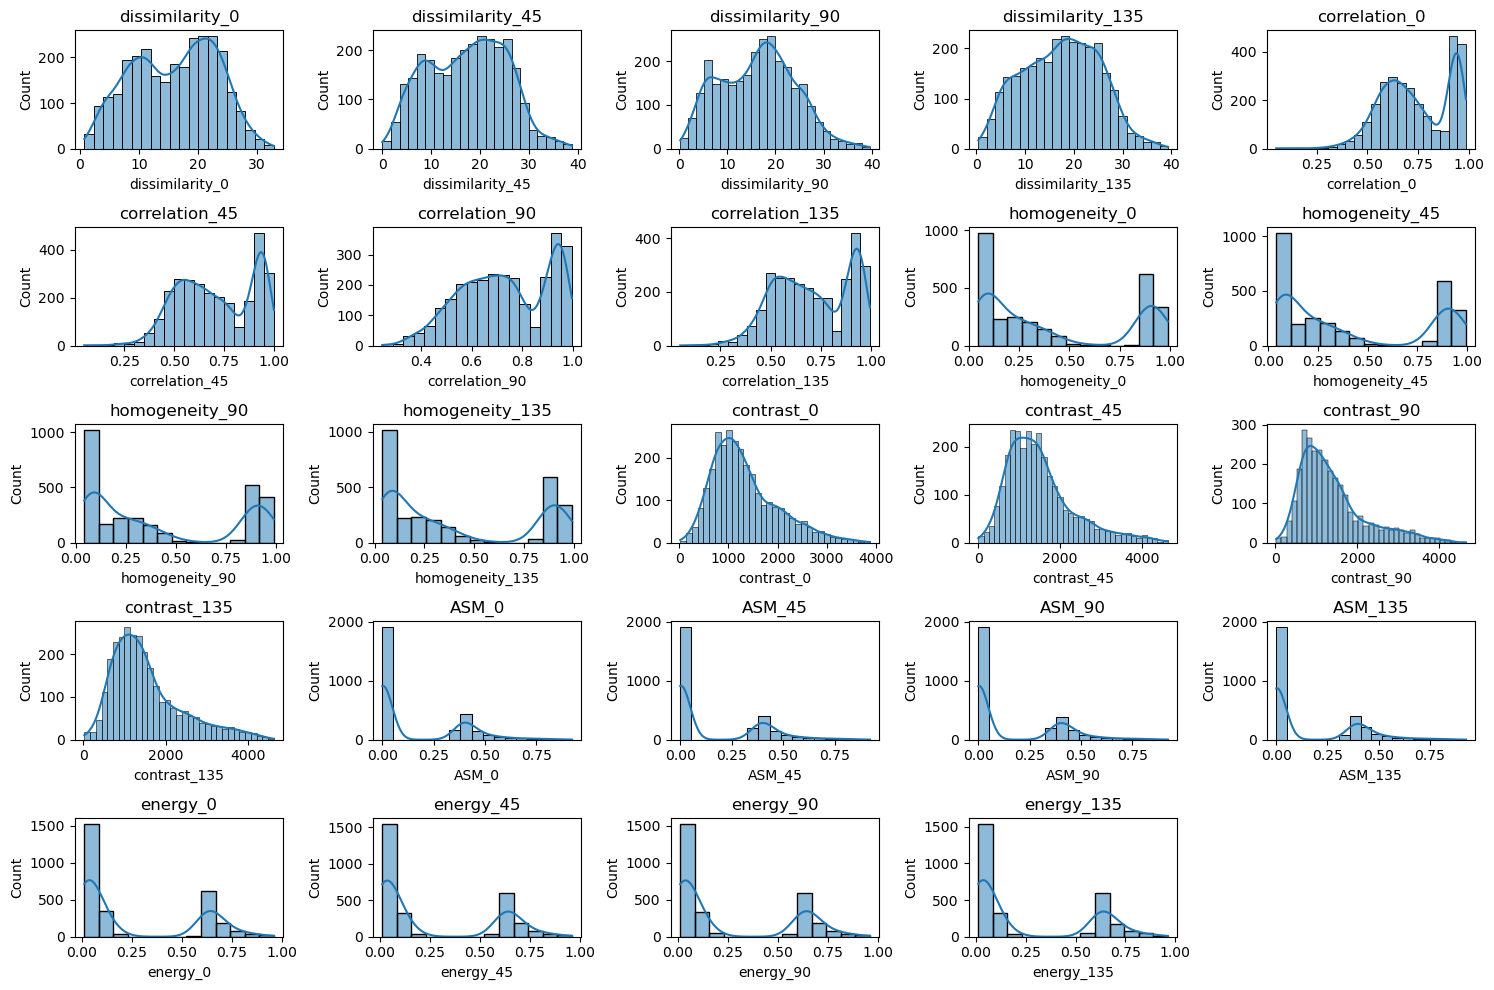

In [6]:
# Visualizing the distribution of each feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(5, 5, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

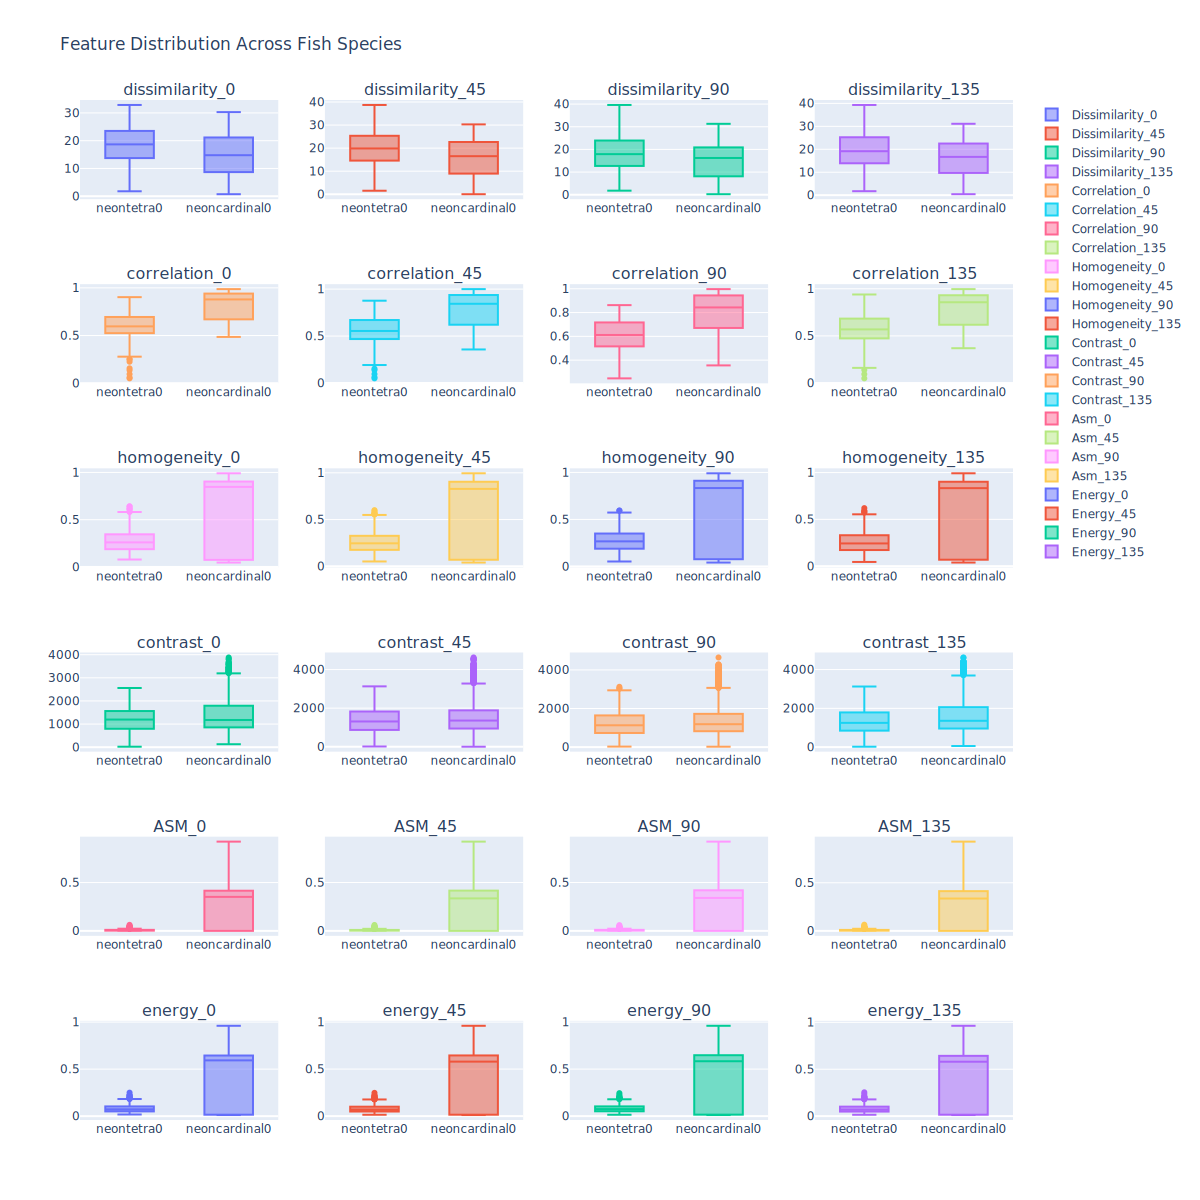

In [7]:
# Define the subplot grid
rows = 6
cols = 4
fig = make_subplots(rows=rows, cols=cols, subplot_titles=data.columns[:-1])

# Iterate over each feature and add box plots to the grid
for i, feature in enumerate(data.columns[:-1]):
    row = i // cols + 1
    col = i % cols + 1
    box = go.Box(x=data['label'], y=data[feature], name=feature.capitalize())
    fig.add_trace(box, row=row, col=col)

# Update layout
fig.update_layout(height=1200, width=1200, title_text="Feature Distribution Across Fish Species")

# Show the plot
fig.show()

In [8]:
print(data.describe())

       dissimilarity_0  dissimilarity_45  dissimilarity_90  dissimilarity_135  \
count      2870.000000       2870.000000       2870.000000        2870.000000   
mean         15.960851         17.323340         16.294558          17.410925   
std           7.070231          7.938154          7.730515           7.780405   
min           0.721966          0.026665          0.228384           0.417416   
25%          10.085441         10.575712          9.911573          11.354235   
50%          16.557054         17.893412         16.778785          17.745877   
75%          21.745736         23.663678         21.713833          23.425230   
max          32.873380         38.715433         39.616872          39.322199   

       correlation_0  correlation_45  correlation_90  correlation_135  \
count    2870.000000     2870.000000     2870.000000      2870.000000   
mean        0.739560        0.708899        0.734984         0.708668   
std         0.168129        0.187812        0.17264

The provided summary statistics offer a comprehensive overview of the dataset's features. Across the dataset, the mean dissimilarity values range from approximately 15.96 to 17.41, with standard deviations between 7.07 and 7.78, indicating moderate variability. Notably, the dissimilarity_0 feature exhibits a wide range of values, from 0.72 to 32.87, suggesting significant diversity within this particular attribute. The correlation features demonstrate strong correlations among different angles, with mean values ranging from 0.708 to 0.739, indicating consistent patterns across different orientations. Additionally, the homogeneity and contrast features display substantial variability, with mean values around 0.41 to 0.42 and 1378 to 1534, respectively. The angular second moment (ASM) and energy features also present varying degrees of dispersion, with mean ASM values approximately ranging from 0.154 to 0.153 and mean energy values around 0.256 to 0.254. Overall, these statistics provide valuable insights into the distribution and characteristics of the dataset's features, laying the foundation for further exploratory analysis and modeling.

### Build Model

The create_one_hot_encoding function converts class labels into a one-hot encoded matrix. The train function trains the neural network weights using the ReLU activation function and returns the trained beta matrix. The soft_max function computes the softmax function for a single layer, while matrix_soft_max computes it for a matrix. The check_network_power function evaluates the power of the network by comparing predicted and real outputs, returning the number of correct predictions. Finally, the test function tests the neural network on test data and returns the accuracy of the model. Overall, these functions provide essential building blocks for creating and evaluating a neural network model.

In [9]:
def create_one_hot_encoding(classes, shape):
    """
    Create one-hot encoding for target classes.

    Args:
        classes (numpy.ndarray): Array of class labels.
        shape (tuple): Shape of the one-hot encoded matrix.

    Returns:
        numpy.ndarray: One-hot encoded matrix.
    """
    one_hot_encoding = np.zeros(shape)
    for i in range(0, len(one_hot_encoding)):
        one_hot_encoding[i][int(classes[i])] = 1
    return one_hot_encoding

def train(weights, x, y):
    """
    Train the neural network weights.

    Args:
        weights (numpy.ndarray): Initial weights.
        x (numpy.ndarray): Input features.
        y (numpy.ndarray): Target labels.

    Returns:
        numpy.ndarray: Trained beta matrix.
    """
    h = x.dot(weights)
    h = np.maximum(h, 0, h)  # ReLU activation function
    return np.linalg.pinv(h).dot(y)

def soft_max(layer):
    """
    Compute the softmax function for a single layer.

    Args:
        layer (numpy.ndarray): Input layer.

    Returns:
        numpy.ndarray: Softmax output layer.
    """
    soft_max_output_layer = np.zeros(len(layer))
    for i in range(0, len(layer)):
        numitor = 0
        for j in range(0, len(layer)):
            numitor += np.exp(layer[j] - np.max(layer))
        soft_max_output_layer[i] = np.exp(layer[i] - np.max(layer)) / numitor
    return soft_max_output_layer

def matrix_soft_max(matrix_):
    """
    Compute the softmax function for a matrix.

    Args:
        matrix_ (list of numpy.ndarray): Input matrix.

    Returns:
        list of numpy.ndarray: Softmax output matrix.
    """
    soft_max_matrix = []
    for i in range(0, len(matrix_)):
        soft_max_matrix.append(soft_max(matrix_[i]))
    return soft_max_matrix

def check_network_power(o, o_real):
    """
    Check the power of the network by comparing predicted and real outputs.

    Args:
        o (numpy.ndarray): Predicted output.
        o_real (numpy.ndarray): Real output.

    Returns:
        int: Number of correct predictions.
    """
    count = 0
    for i in range(0, len(o)):
        count += 1 if np.argmax(o[i]) == np.argmax(o_real[i]) else 0
    return count

def test(weights, beta, x, y):
    """
    Test the neural network on test data.

    Args:
        weights (numpy.ndarray): Initial weights.
        beta (numpy.ndarray): Trained beta matrix.
        x (numpy.ndarray): Test input features.
        y (numpy.ndarray): Test target labels.

    Returns:
        float: Accuracy of the model.
    """
    h = x.dot(weights)
    h = np.maximum(h, 0, h)  # ReLU activation function
    o = matrix_soft_max(h.dot(beta))
    return check_network_power(o, y) / len(y)

In [10]:
# Convert label strings to float values for binary classification
for i in range(len(data)):
    if data['label'][i] == 'neontetra0':
        data['label'][i] = 1.0
    if data['label'][i] == 'neoncardinal0':
        data['label'][i] = 0.0 

This process involves initializing variables and preprocessing the data for building a machine learning model. It includes defining parameters such as the class column index and the proportion of data for testing. The data is then converted into a numpy array, shuffled, and separated into feature and target label matrices. The target labels are one-hot encoded, and the feature matrix is normalized. Finally, the data is split into training and testing sets, with the number of perceptrons in the hidden layer determined for model construction.

In [11]:
# Initialize variables and preprocess data
class_column = 24  # Index of the class label column
test_size = 0.1  # Proportion of the dataset for testing
db = data.iloc[:, :].values.astype(float)  # Convert DataFrame to numpy array and ensure data type is float
np.random.shuffle(db)  # Shuffle the dataset
y = db[:, class_column]  # Extract class labels
y -= np.min(y)  # Shift class labels to start from 0
output_layer_perceptron_count = len(np.unique(y))  # Count unique classes for output layer perceptrons
y = create_one_hot_encoding(y, (len(y), len(np.unique(y))))  # One-hot encode the class labels
x = np.delete(db, [class_column], axis=1)  # Remove class label column to get feature matrix
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)  # Split data into training and testing sets
hidden_layer_perceptron_count = len(y_test)  # Count perceptrons in the hidden layer
x = preprocessing.normalize(x)  # Normalize feature matrix

In [12]:
# Initialize weights randomly and train the model
weights = np.random.random((len(x[0]), hidden_layer_perceptron_count))
beta = train(weights, x_train, y_train)

In [13]:
# Test the model and print accuracy
print("Accuracy = %s." % test(weights, beta, x_test, y_test))

Accuracy = 0.9790940766550522.


In [14]:
# Convert label float values to strings
for i in range(len(data)):
    if data['label'][i] == 1.0:
        data['label'][i] = 'neontetra0'
    if data['label'][i] == 0.0:
        data['label'][i] = 'neoncardinal0'

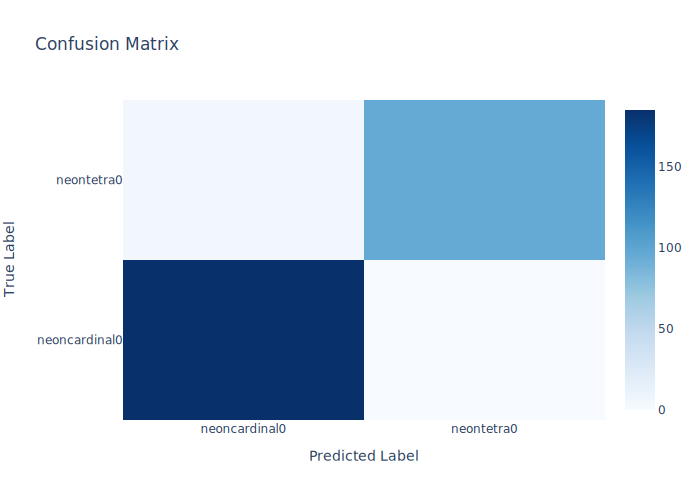

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import plotly.graph_objects as go

# Compute confusion matrix
y_pred = np.argmax(matrix_soft_max(x_test.dot(weights).dot(beta)), axis=1)
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Get label names
label_names = np.unique(data['label'])

# Plot confusion matrix with label names
fig = go.Figure(data=go.Heatmap(z=conf_matrix, x=label_names, y=label_names, colorscale='Blues'))
fig.update_layout(title='Confusion Matrix', xaxis_title='Predicted Label', yaxis_title='True Label')

fig.show()

Here's the breakdown of the matrix:

True Positives (TP): 96
True Negatives (TN): 185
False Positives (FP): 0
False Negatives (FN): 6
From this confusion matrix, we can derive the following metrics:

* Accuracy:

    Accuracy measures the overall correctness of the model.
    Accuracy = (TP + TN) / (TP + TN + FP + FN) = (185 + 96) / (185 + 0 + 6 + 96) = 0.97
* Precision:

    Precision measures the accuracy of positive predictions.
    Precision = TP / (TP + FP) = 96 / (96 + 0) = 1.0
* Recall (Sensitivity):

    Recall measures the ratio of correctly predicted positive observations to the total actual positives.
    Recall = TP / (TP + FN) = 96 / (96 + 6) = 0.941
* F1 Score:

    The F1 Score is the harmonic mean of precision and recall.
    F1 Score = 2 * (Precision * Recall) / (Precision + Recall) = 2 * (1.0 * 0.941) / (1.0 + 0.941) = 0.969
    
Overall, the model shows high accuracy, precision, recall, and F1 Score, indicating that it performs well in correctly identifying both positive and negative instances. However, it's essential to consider the specific context of the classification problem and the associated costs of false positives and false negatives when interpreting these metrics.